## Decision trees 
Данный датасет представляет собой набор данных с разными марками авто и их характеристиками.

Ссылка на датасет: http://archive.ics.uci.edu/ml/datasets/Automobile

#### Найдите себе новый датасет для классификации (бинарной или многоклассовой — не важно), чтобы не пересекался с моими примерами.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
!unzip /content/drive/MyDrive/Datasets/machinedata.zip -d data

In [ ]:
import pandas as pd #добавим явные заголовки колонок из файла описания датасета
machframe = pd.read_csv("/content/data/imports-85.txt",names=['symboling', 'normalized-losses', 'make', 'fuel-type', 
                                           'aspiration', 'num-of-doors','body-style','drive-wheels',
                                           'engine-location','wheel-base','length','width','height',
                                           'curb-weight','engine-type','num-of-cylinders','engine-size',
                                           'fuel-system','bore','stroke','compression-ratio','horsepower',
                                          'peak-rpm','city-mpg','highway-mpg','price'])
machframe.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
fp = "/content/data/imports-85_inf.txt" #вытащим описание датасета
with open(fp) as file_handler:
    for line in file_handler:
        print(line)

1. Title: 1985 Auto Imports Database



2. Source Information:

   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)

   -- Date: 19 May 1987

   -- Sources:

     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's

        Automotive Yearbook.

     2) Personal Auto Manuals, Insurance Services Office, 160 Water

        Street, New York, NY 10038 

     3) Insurance Collision Report, Insurance Institute for Highway

        Safety, Watergate 600, Washington, DC 20037



3. Past Usage:

   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction

      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},

      51--57.

	 -- Predicted price of car using all numeric and Boolean attributes

	 -- Method: an instance-based learning (IBL) algorithm derived from a

	    localized k-nearest neighbor algorithm.  Compared with a

	    linear regression prediction...so all instances

	    with missing attribute values were

#### 1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [ ]:
machframe = machframe[machframe[:] != '?'].iloc[:,:] #найдем все пропуски в данных и заменим их на медианный
machframe.fillna(machframe.median(), inplace = True)

In [ ]:
mach = machframe.drop(columns=['make', 'body-style', 'drive-wheels', 'fuel-system', 'engine-type'])

In [ ]:
mach = pd.concat([mach,pd.get_dummies(machframe['make'],drop_first = True)],axis = 1)
mach = pd.concat([mach,pd.get_dummies(machframe['body-style'],drop_first = True)],axis = 1)
mach = pd.concat([mach,pd.get_dummies(machframe['drive-wheels'],drop_first = True)],axis = 1)
mach = pd.concat([mach,pd.get_dummies(machframe['fuel-system'],drop_first = True)],axis = 1)
mach = pd.concat([mach,pd.get_dummies(machframe['engine-type'], drop_first = True)],axis = 1)

In [ ]:
mach['fuel-type'] = pd.factorize(machframe['fuel-type'])[0]
mach['aspiration'] = pd.factorize(machframe['aspiration'])[0]
mach['num-of-doors'] = pd.factorize(machframe['num-of-doors'])[0]
mach['engine-location'] = pd.factorize(machframe['engine-location'])[0]
mach['num-of-cylinders'] = pd.factorize(machframe['num-of-cylinders'])[0]
mach

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,115,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27,13495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,115,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,115,0,0,0,0,94.5,171.2,65.5,52.4,2823,1,152,2.68,3.47,9.0,154,5000,19,26,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2,164,0,0,1,0,99.8,176.6,66.2,54.3,2337,0,109,3.19,3.40,10.0,102,5500,24,30,13950,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2,164,0,0,1,0,99.4,176.6,66.4,54.3,2824,2,136,3.19,3.40,8.0,115,5500,18,22,17450,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,0,0,1,0,109.1,188.8,68.9,55.5,2952,0,141,3.78,3.15,9.5,114,5400,23,28,16845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
201,-1,95,0,1,1,0,109.1,188.8,68.8,55.5,3049,0,141,3.78,3.15,8.7,160,5300,19,25,19045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
202,-1,95,0,0,1,0,109.1,188.8,68.9,55.5,3012,1,173,3.58,2.87,8.8,134,5500,18,23,21485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
203,-1,95,1,1,1,0,109.1,188.8,68.9,55.5,3217,1,145,3.01,3.40,23.0,106,4800,26,27,22470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


#### 1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализовапнного датасета KNeighborsClassifier (без использования конвееров)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection
import numpy as np

In [ ]:
scaler = StandardScaler()

In [ ]:
data_tr = mach.drop("num-of-doors",axis = 1)
target = mach["num-of-doors"]

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data_tr, target, random_state = 0
)

In [ ]:
scaler.fit(X_train) #нормируем данные
tdtr = scaler.transform(X_train)
tdt = scaler.transform(X_test)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 5) #кормим кнн нашими данными
clf.fit(tdtr, y_train)
cl1 = clf.predict(tdt)

In [ ]:
import sklearn.metrics as metr

In [ ]:
metr.accuracy_score(y_test, cl1) #доля правильных ответов

0.6923076923076923

#### 1.2. То же самое и использованием sklearn.pipeline.Pipeline

In [ ]:
import sklearn.pipeline

In [ ]:
knn_pipe = sklearn.pipeline.Pipeline([ #инициализируем пайплайн, сначала данные попадут в scaler, потом сразу в kNN 
    ('scaler', sklearn.preprocessing.StandardScaler()), #помогает сократить код, чтоб не писать одно и тоже
    ('knn', sklearn.neighbors.KNeighborsClassifier(n_jobs=-1))
])
knn_pipe.fit(tdtr,y_train) #вызываемые методы должны совпадать у всех объектов пайплайна
cl2 = knn_pipe.predict(tdt)
metr.accuracy_score(y_test, cl2) #доля правильных ответов

0.6923076923076923

#### 1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [ ]:
knn = sklearn.neighbors.KNeighborsClassifier( n_neighbors = 10 )
#__________#
knn_params = { 'n_neighbors': range(3, 17) } 
#__________#
knn_grid = sklearn.model_selection.GridSearchCV(knn, knn_params) 
#__________#
knn_grid.fit( tdtr, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(3, 17)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
knn_grid.best_params_, knn_grid.best_score_ #получаем оптимальные параметры для заданного классификатора

({'n_neighbors': 14}, 0.8567741935483871)

In [ ]:
metr.accuracy_score(y_test, knn_grid.predict(tdt)) #доля правильных ответов

0.7692307692307693

#### 2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [ ]:
import sklearn.tree
clf_tree = sklearn.tree.DecisionTreeClassifier( #создаем дерево max_depth(максимальная глубина) 3 и random_state(случайный разброс) 17
    criterion = 'entropy', max_depth = 3, random_state = 17
)
clf_tree.fit( tdtr, y_train )
cl_t = clf_tree.predict(tdt)
metr.accuracy_score(y_test, cl_t)

0.8269230769230769

In [ ]:
#смотрим на табличку метрик
print( sklearn.metrics.classification_report( 
    cl_t, y_test, target_names=["two", "four"]
) )

              precision    recall  f1-score   support

         two       0.72      0.95      0.82        22
        four       0.96      0.73      0.83        30

    accuracy                           0.83        52
   macro avg       0.84      0.84      0.83        52
weighted avg       0.86      0.83      0.83        52



#### 2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier( max_depth = 3, random_state = 17 )
tree_params = { 'max_depth': range(1, 25),
              'max_features': range(2, 20)}
#подбираем параметры для дерева
tree_grid = sklearn.model_selection.GridSearchCV(tree, tree_params) 

tree_grid.fit( tdtr, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 25),
                         'ma

In [ ]:
#оптимальные параметры
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 8, 'max_features': 12}, 0.8890322580645161)

In [ ]:
#доля правильных ответов
metr.accuracy_score(y_test, tree_grid.predict(tdt)) 

0.8461538461538461

#### 2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортиров их по убыванию по важности

In [ ]:
#важность каждого признака для классификации
clf_tree.feature_importances_ 

array([0.49533809, 0.0533553 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06428366, 0.        ,
       0.06316038, 0.        , 0.        , 0.        , 0.04030901,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.21379229, 0.06976128,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
name_col = mach.drop(columns = 'rotor').columns
name_col

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv'],
      dtype='object')

In [ ]:
#df = pd.DataFrame( columns = data1.columns)
y = pd.Series(data=clf_tree.feature_importances_, index=name_col)
ind = y[:] == 0
y = y[~ind]

([<matplotlib.axis.XTick at 0x7ffb9f8c2290>,
 [Text(0, 0, 'symboling'),
  Text(0, 0, 'normalized-losses'),
  Text(0, 0, 'width'),
  Text(0, 0, 'curb-weight'),
  Text(0, 0, 'stroke'),
  Text(0, 0, 'hatchback'),
  Text(0, 0, 'sedan')])

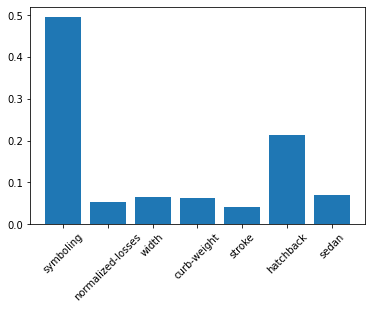

In [ ]:
x = range(len(y))
plt.bar(x, y)
plt.xticks(x, y.index,rotation = 45)

In [ ]:
y.sort_values().iloc[-4: -1]

width        0.064284
sedan        0.069761
hatchback    0.213792
dtype: float64

#### 3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [ ]:
import sklearn.ensemble

#количество деревьев 20
forest = sklearn.ensemble.RandomForestClassifier( n_estimators=20, random_state=17 )
forest.fit( tdtr, y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [ ]:
metr.accuracy_score( y_test, forest.predict(tdt) ) #доля правильных ответов

0.8269230769230769

#### 3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [ ]:
forest_params = {
    'max_depth': range(1,20),
    'max_features': range(3,15)
}
#подбираем параметры 
#чем больший охват у параметров, тем дольше работает алгоритм, поэтому надо аккуратнее подбирать
forest_grid = sklearn.model_selection.GridSearchCV(forest, forest_params, cv = 5)

forest_grid.fit( tdtr, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False, random_state=17,
                                   

In [ ]:
#смотрим на подобранные оптимальные параметры
forest_grid.best_params_, forest_grid.best_score_ 

({'max_depth': 9, 'max_features': 11}, 0.9286021505376343)

In [ ]:
#доля правильных ответов
metr.accuracy_score( y_test, forest_grid.predict(tdt) ) 

0.8461538461538461

#### По итогу самым точным алгоритмом оказался "Лес" и "Дерево" с долей правильных ответов в 0.82, следом идет kNN с  0.69. Оптимизация параметров, увеличивает долю правильных ответов в пределах до +0.1 для каждого случая.